In [93]:
import pandas as pd
import numpy as np


In [94]:
df=pd.read_csv("./1_boston_housing.csv")

In [95]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<Axes: >

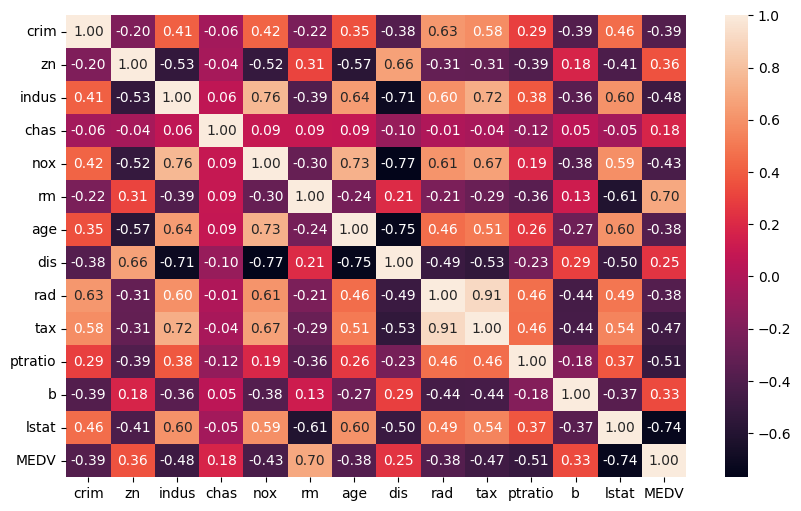

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
cor=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor, annot=True, fmt=".2f")

In [97]:
print(df.columns)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'MEDV'],
      dtype='object')


In [98]:
columns_to_drop=['crim','zn', 'chas','b']
columns_to_drop=[col for col in columns_to_drop if col in df.columns]

X=df.drop(columns=columns_to_drop)
y=df['MEDV']

from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=4)
print( X.shape)

(506, 10)


In [99]:
!pip install tensorflow

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()

model.add(Dense(128, input_shape=(10, ), activation='relu', name='dense_input_layer'))
model.add(Dense(64, activation='relu', name='dense_1'))
model.add(Dense(32, activation='relu', name='dense_2')) 
model.add(Dense(16, activation='relu', name='dense_3'))
model.add(Dense(8, activation='relu', name='dense_4'))
model.add(Dense(1, activation='linear', name='output'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

/usr/local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_input_layer (Dense)       │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,417 (48.50 KB)

 Trainable params: 12,417 (48.50 KB)

 Non-trainable params: 0 (0.00 B)

In [101]:
from sklearn.preprocessing import MinMaxScaler
min_max_s= MinMaxScaler()
min_max_s.fit(X_train)
X_train= min_max_s.transform(X_train)
X_test= min_max_s.transform(X_test)

In [102]:
print(X.shape)

(506, 10)


In [103]:
t= model.fit(X_train,y_train,epochs=120,validation_split=0.03, verbose=1)

Epoch 1/120
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 580.3057 - mae: 22.2883 - val_loss: 456.6317 - val_mae: 19.9327
Epoch 2/120
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 569.6116 - mae: 22.0482 - val_loss: 422.3119 - val_mae: 18.9793
Epoch 3/120
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 519.9462 - mae: 20.6877 - val_loss: 343.1473 - val_mae: 16.5182
Epoch 4/120
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 381.6349 - mae: 17.3132 - val_loss: 201.7361 - val_mae: 11.4045
Epoch 5/120
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 219.0579 - mae: 12.0483 - val_loss: 158.3914 - val_mae: 11.0416
Epoch 6/120
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 141.8166 - mae: 9.4963 - val_loss: 143.4677 - val_mae: 10.3561
Epoch 7/120
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 126.9352 - mae: 8.8881 - val_loss: 93.2776 - val_mae: 8.3281
Epoch 8/120
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 89.8680 - mae: 7.3493 - val_loss: 78.2299 - val_mae: 7.4987
Epoch 9/120
11/11 ━━━━━

In [104]:
print(X.shape)

(506, 10)


In [105]:
mse_nn,mae_nn=model.evaluate(X_test,y_test)
print(mse_nn)
print(mae_nn)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0143 - mae: 0.0758 
0.020187895745038986
0.08824937790632248


In [108]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score (Accuracy Equivalent): {r2:.4f}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R2 Score (Accuracy Equivalent): 0.9998


In [107]:
print("R2-in terms of %",r2*100,"%")

R2-in terms of % 99.98066665597509 %
